In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail/Online Retail.csv


**GEREKLİ KÜTÜPHANELERİ İMPORT ETME VE DATAYI OKUMA** 

Bu aşamada projede kullanılan veri setini yükleyeceğiz.Ve kullanacağımız kütüphaneleri import edeceğiz.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import plotly.express as px
from sklearn.cluster import KMeans

In [8]:
yol = '/kaggle/input/online-retail/Online Retail.csv'
data = pd.read_csv(yol)

In [9]:
num_rows = data.shape[0]

print("Satır Sayısı: ",{num_rows})

Satır Sayısı:  {541909}


In [10]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom  


**DATASET HAKKINDA BİLGİLER**

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB
None


In [12]:
print(data.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object


In [13]:
print( data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114   15287.518434
std       218.081158      96.759853    1484.746041
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   14367.000000
50%         3.000000       2.080000   15287.000000
75%        10.000000       4.130000   16255.000000
max     80995.000000   38970.000000   18287.000000


**Var olan eksik değerleri bularak onları datasetten kaldırma**

In [14]:
print("\nEksik değerler:\n", data.isnull().sum())


Eksik değerler:
 InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [15]:
data_clean = data.dropna()  # Eksik değerleri içeren satırları kaldırma

**DATASETİN TEMİZ HALİ**

In [16]:
print("\nTemizlenmiş veri seti bilgileri:\n", data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   540455 non-null  int64  
 7   Country      540455 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 37.1+ MB

Temizlenmiş veri seti bilgileri:
 None


Programda varsa NaN değerleri bunları kaldırarak sonsuz dögü oluşmasını engelledik.

In [47]:
# Sonsuz değerleri NaN olarak dönüştürme
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Veri temizleme (NaN değerleri içeren satırları kaldırma)
data_clean = data.dropna()

Hedef değişkenimiz datasette var olmadığı için bunu oluşturduk.

In [18]:
data['TotalSales'] = data['Quantity'] * data['UnitPrice']  # Hedef değişken

Hedef değişkeni en çok etkileyen değişkenleri belirleyip görselleştirme yapıldı.

In [19]:
# Quantity için histogram
fig = px.histogram(data_clean, x='Quantity', nbins=50, title='Quantity Dağılımı')
fig.update_xaxes(title_text='Quantity')
fig.update_yaxes(title_text='Frekans')
fig.show()

# UnitPrice için histogram
fig = px.histogram(data_clean, x='UnitPrice', nbins=50, title='UnitPrice Dağılımı')
fig.update_xaxes(title_text='UnitPrice')
fig.update_yaxes(title_text='Frekans')
fig.show()

# Quantity ve UnitPrice ilişkisi için
fig = px.scatter(data_clean, x='Quantity', y='UnitPrice', title='Quantity ve UnitPrice İlişkisi')
fig.update_xaxes(title_text='Quantity')
fig.update_yaxes(title_text='UnitPrice')
fig.show()


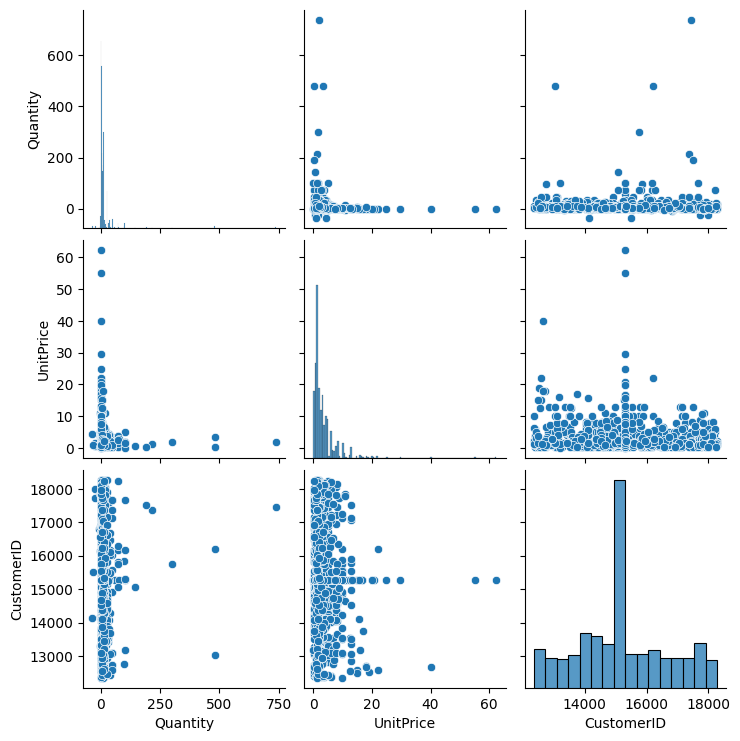

In [20]:
small_sample = data_clean[['Quantity', 'UnitPrice', 'Country', 'CustomerID']].sample(n=1000, random_state=1)
sns.pairplot(small_sample)
plt.show()

Yukarıda veri setinin incelenmesi ve görselleştirilmesi gerçekleşmiştir. Bu bize çalışma yaptığımız dataseti analiz edip anlamamıza yardımcı olacaktır. Hedef değişken olan TotalSales değişkenini doğrudan ya da dolaylı etkileyen diğer değişkenlerin incelemesi ve görselleştrilmesi verilmiştir. Bu bağlamlarda TotalSale i tahmin eden bir gözetimli öğrenme modeli oluşturacağız.

In [21]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  
data['Month'] = data['InvoiceDate'].dt.to_period('M')  # Ay bazlı dönem oluşturma

 Ülke ve müşteri bazında satın alınan ürün miktarını ekliyoruz.Zaman formatına çevirip ay bazlı dönem oluştuyoruz.Aşağıda ise ülke ve benzersiz müşteri sayılarını kullanıyoruz.

In [22]:
data['CountryTotalSales'] = data.groupby('Country')['TotalSales'].transform('sum')
data['CustomerTotalSales'] = data.groupby('CustomerID')['TotalSales'].transform('sum')

Burada tahmin edilmesi beklenen hedef değişken "TotalSales"dır.
Diğer değişkenleri yardımcı değişken olarak belirliyoruz.

In [23]:
X = data[['Quantity', 'UnitPrice', 'CountryTotalSales', 'CustomerTotalSales']]
y = data['TotalSales']

In [24]:
# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Özellikleri standardize ediyoruz
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest Model temel olarak, birden fazla karar ağacı (decision tree) modelini birleştirerek çalışır ve her ağacın çıktısının ortalamasını alarak kararını verir. Bu sayede doğruluk oranı da artmış olur.Aynı zamanda varsayımlar da gerektirmez.

In [26]:
# Random Forest Modeli birden fazla karar ağacı kullanarak daha doğru tahminler yapmaya yardımcı olur
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Tahmin yapma
y_pred = rf_model.predict(X_test_scaled)

In [28]:
# Model performansını değerlendirme
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [29]:
#Özellik önemini görselleştirme
feature_importances = rf_model.feature_importances_
features = X.columns

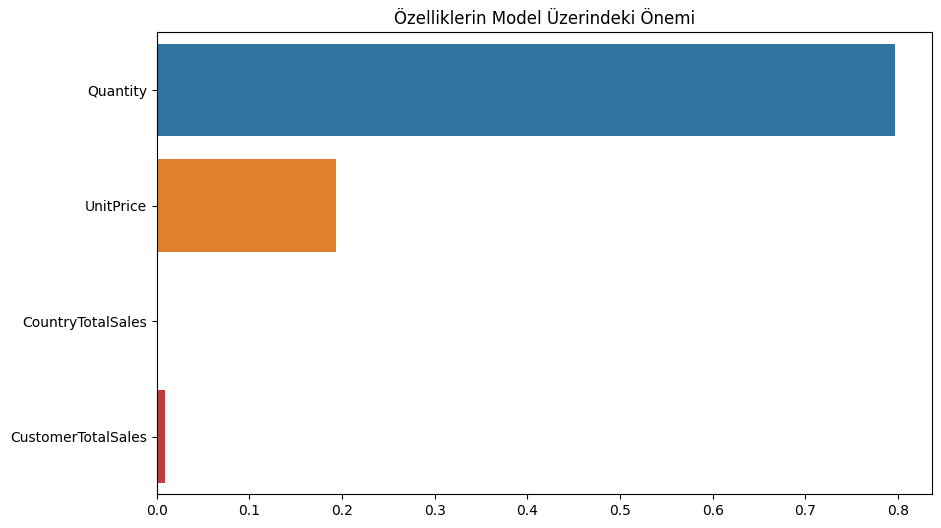

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Özelliklerin Model Üzerindeki Önemi')
plt.show()

Grid Search: Tüm hiperparametre kombinasyonlarını sistematik olarak deneyerek en iyi sonucu bulmaya çalışır.Modelin eğitim sürecini kontrol eden hiperparametrelerin en iyi kombinasyonunu bulmak için kullanılmaktadır.

In [31]:
# Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error', 
                           cv=3,  #dDoğrulama Katmanı
                           verbose=1,
                           n_jobs=-1)  # Paralel işleme

# Modeli fit etme
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreleri ve skoru yazdırma
print("En İyi Parametreler:", grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
En İyi Parametreler: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [32]:
#Optimize edilen modelle tahmin yapma
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

In [33]:
# Optimize edilmiş model performansını değerlendirme
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

In [34]:
print(f'Optimized MAE: {mae_best}')
print(f'Optimized MSE: {mse_best}')
print(f'Optimized RMSE: {rmse_best}')
print(f'Optimized R2 Score: {r2_best}')


Optimized MAE: 1.797667782843177
Optimized MSE: 99260.98576196632
Optimized RMSE: 315.05711507910166
Optimized R2 Score: 0.5729660546869091


Bu yapılan işlemler gözetimli öğrenmeye ait olup amaç TotalSales değişkeni hakkında tahmin yürütmektir

In [35]:
y_true = [0, 1, 0, 1, 0, 1]
y_pred = [0, 1, 0, 0, 0, 1]
accuracy = accuracy_score(y_true, y_pred)
print("Doğruluk Oranı:", accuracy)

Doğruluk Oranı: 0.8333333333333334


**GÖZETİMSİZ ÖĞRENME İLE ÇALIŞMA**

 Gözetimsiz öğrenme, verilerdeki gizli yapıları, desenleri veya ilişkileri keşfetmek amacıyla kullanılır.Daha çok ilişki kurma ve veri keşfi gibi durumlarda kullanılır. Gözetimli öğrenme gibi tahmin yapma yeteneği yoktur. Bu yüzden tahmin için aslında dolaylı yoldan katkı sağlar

In [36]:
features = data[['Quantity', 'UnitPrice']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)#K-Means için özellik ölçeklendirme
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)#Kümeleme (5 küme)


In [37]:
# Küme merkezlerini inceleme
print("Küme Merkezleri:\n", kmeans.cluster_centers_)

# Gözetimli öğrenme için bağımsız ve hedef değişkenleri hazırlama
X = data[['Quantity', 'UnitPrice', 'Cluster']]  # Bağımsız değişkenler (Cluster ekli)
y = data['TotalSales']  # Hedef değişken

Küme Merkezleri:
 [[ 4.03619026e-06 -6.73113660e-03]
 [-4.67491836e-02  7.72564494e+01]
 [ 3.55810287e+02 -3.15328759e-02]
 [-3.55897890e+02 -3.15328759e-02]
 [-4.83868455e-02  4.02702398e+02]]


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
y_pred = model.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
results = pd.DataFrame({'Gerçek Değer': y_test, 'Tahmin Edilen Değer': y_pred})
print(results.head())


        Gerçek Değer  Tahmin Edilen Değer
209268         20.40                20.40
207108         27.80                27.80
167085          2.60                 2.60
471836          5.85                 5.85
115865         19.90                19.90


In [55]:
sns.set(style="whitegrid")

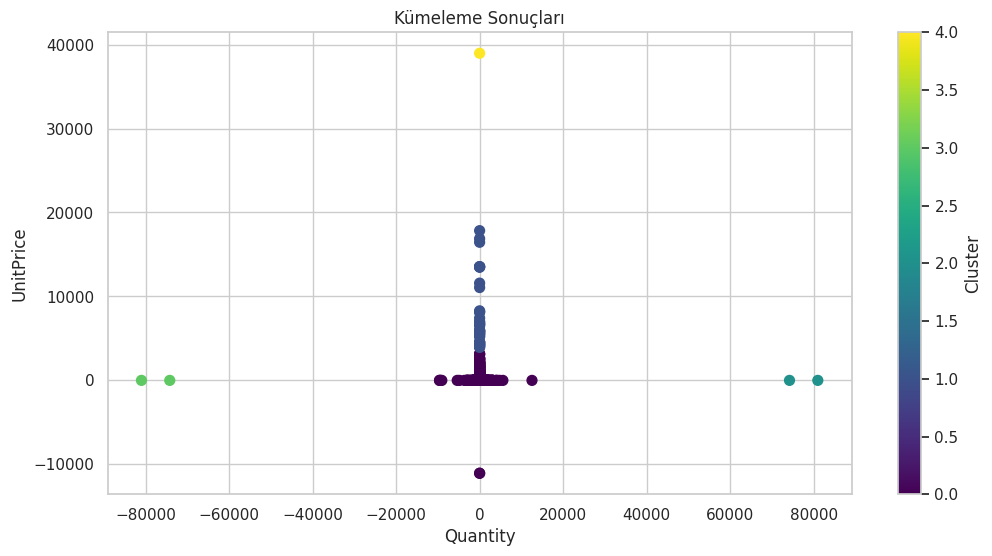

In [56]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Quantity'], data['UnitPrice'], c=data['Cluster'], cmap='viridis', s=50)
plt.title('Kümeleme Sonuçları')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.colorbar(label='Cluster')
plt.show()

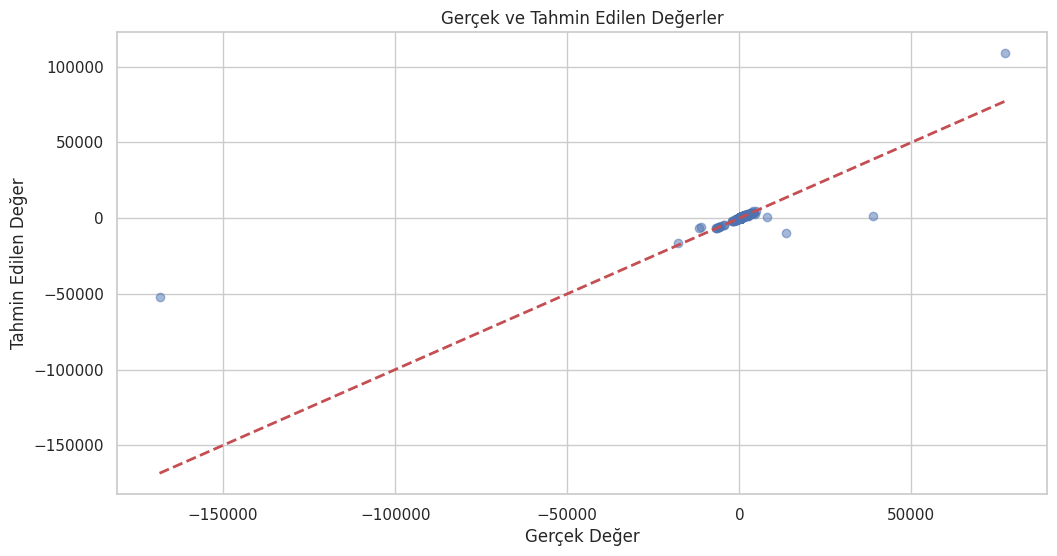

In [57]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değer')
plt.ylabel('Tahmin Edilen Değer')
plt.show()


MAE (Mean Absolute Error), tahminlerin gerçek değerlerden ne kadar uzak olduğunu ortalama mutlak fark olarak ölçer, yani tahminlerin ortalama mutlak hata miktarını gösterir. MSE (Mean Squared Error), tahmin hatalarının karesinin ortalamasını alarak büyük hataların daha fazla cezalandırılmasını sağlar, bu da modelin büyük hataları minimize etmeye çalıştığını gösterir. RMSE (Root Mean Squared Error), MSE'nin karekökünü alarak hata ölçümünü orijinal veri ölçeğine geri döndürür, bu da hataları daha anlaşılır bir şekilde sunar. R^2 (R-squared) ise modelin açıklayıcı gücünü ölçer ve modelin gerçek veri varyansını ne kadar açıkladığını yüzde olarak ifade eder

Görüldüğü gibi R^2= 0.572.... çıkmıştır. Bu da hata payının yüksek olduğunu gösterir.

In [62]:
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Optimized MAE: {mae_best}')
print(f'Optimized MSE: {mse_best}')
print(f'Optimized RMSE: {rmse_best}')
print(f'Optimized R2 Score: {r2_best}')

Optimized MAE: 1.797667782843177
Optimized MSE: 99260.98576196632
Optimized RMSE: 315.05711507910166
Optimized R2 Score: 0.5729660546869091
